In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head(3)

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0


In [4]:
df.drop(columns=["Student_ID"],inplace=True)

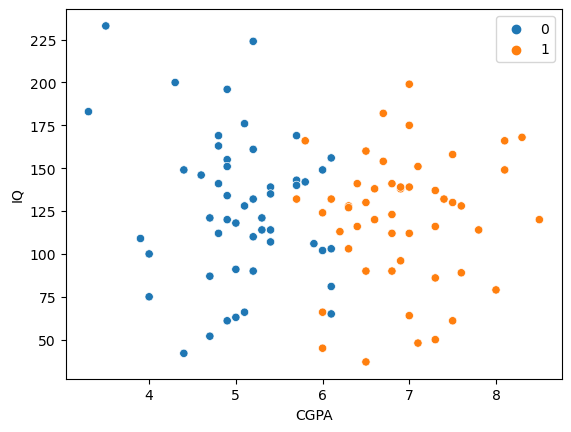

In [5]:
sns.scatterplot(x="CGPA" ,y="IQ",data=df,hue="Placement")
plt.legend(loc=1)
plt.show()

In [6]:
df.head(10)

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
5,7.1,48,1
6,5.7,143,0
7,5.0,63,0
8,6.1,156,0
9,5.1,66,0


In [7]:
x=df[["CGPA","IQ"]] #or df.iloc[:,:-1]
y=df["Placement"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr=LogisticRegression()

In [12]:
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
lr.score(x_test,y_test)*100

95.0

In [14]:
lr.predict([[7.4,142]]) #predict placement

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
#it is used to show the dicision boundary

from mlxtend.plotting import plot_decision_regions

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


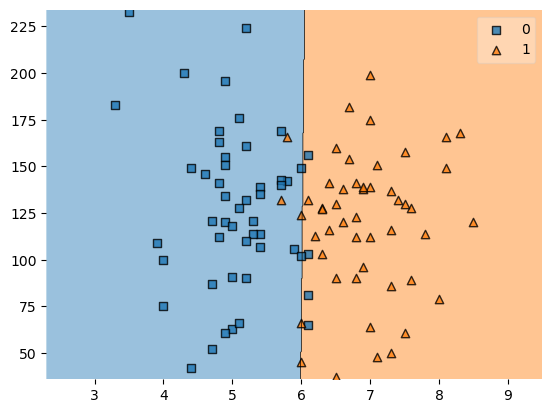

In [18]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

# polynomial features

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pf=PolynomialFeatures(degree=3)
pf.fit(x)
x=pd.DataFrame(pf.transform(x))

In [38]:
x

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,1.0,1.0,6.8,123.0,46.24,836.4,15129.0,1.0,6.8,123.0,...,98867.482624,1.788338e+06,3.234788e+07,3.234788e+07,5.851161e+08,1.058372e+10,5.851161e+08,1.058372e+10,1.914408e+11,3.462826e+12
1,1.0,1.0,5.9,106.0,34.81,625.4,11236.0,1.0,5.9,106.0,...,42180.533641,7.578198e+05,1.361507e+07,1.361507e+07,2.446097e+08,4.394682e+09,2.446097e+08,4.394682e+09,7.895531e+10,1.418519e+12
2,1.0,1.0,5.3,121.0,28.09,641.3,14641.0,1.0,5.3,121.0,...,22164.361129,5.060165e+05,1.155245e+07,1.155245e+07,2.637447e+08,6.021341e+09,2.637447e+08,6.021341e+09,1.374684e+11,3.138428e+12
3,1.0,1.0,7.4,132.0,54.76,976.8,17424.0,1.0,7.4,132.0,...,164206.490176,2.929089e+06,5.224861e+07,5.224861e+07,9.320022e+08,1.662490e+10,9.320022e+08,1.662490e+10,2.965524e+11,5.289853e+12
4,1.0,1.0,5.8,142.0,33.64,823.6,20164.0,1.0,5.8,142.0,...,38068.692544,9.320266e+05,2.281858e+07,2.281858e+07,5.586618e+08,1.367758e+10,5.586618e+08,1.367758e+10,3.348650e+11,8.198418e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,4.3,200.0,18.49,860.0,40000.0,1.0,4.3,200.0,...,6321.363049,2.940169e+05,1.367520e+07,1.367520e+07,6.360560e+08,2.958400e+10,6.360560e+08,2.958400e+10,1.376000e+12,6.400000e+13
96,1.0,1.0,4.4,42.0,19.36,184.8,1764.0,1.0,4.4,42.0,...,7256.313856,6.926481e+04,6.611641e+05,6.611641e+05,6.311112e+06,6.024243e+07,6.311112e+06,6.024243e+07,5.750414e+08,5.489032e+09
97,1.0,1.0,6.7,182.0,44.89,1219.4,33124.0,1.0,6.7,182.0,...,90458.382169,2.457228e+06,6.674857e+07,6.674857e+07,1.813170e+09,4.925328e+10,1.813170e+09,4.925328e+10,1.337925e+12,3.634363e+13
98,1.0,1.0,6.3,103.0,39.69,648.9,10609.0,1.0,6.3,103.0,...,62523.502209,1.022210e+06,1.671232e+07,1.671232e+07,2.732331e+08,4.467144e+09,2.732331e+08,4.467144e+09,7.303427e+10,1.194052e+12


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(x_train,y_train)

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lr.score(x_test,y_test)*100

95.0